In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization settings
plt.style.use("default")


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Python Project\car_price_prediction_.csv")
# Using raw string (r"") to prevent Python from interpreting backslashes as escape characters

# Preview data
df.head()


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [3]:
# Dataset shape
df.shape

# Data types
df.info()

# Summary statistics
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2500.00000,2500,2500.0000,2500.000000,2500,2500,2500.000000,2500,2500.000000,2500
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Diesel,Manual,NaN,Used,NaN,Fiesta
freq,NaN,374,NaN,NaN,655,1308,NaN,855,NaN,103
mean,1250.50000,NaN,2011.6268,3.465240,NaN,NaN,149749.844800,NaN,52638.022532,NaN
std,721.83216,NaN,6.9917,1.432053,NaN,NaN,87919.952034,NaN,27295.833455,NaN
min,1.00000,NaN,2000.0000,1.000000,NaN,NaN,15.000000,NaN,5011.270000,NaN
25%,625.75000,NaN,2005.0000,2.200000,NaN,NaN,71831.500000,NaN,28908.485000,NaN
50%,1250.50000,NaN,2012.0000,3.400000,NaN,NaN,149085.000000,NaN,53485.240000,NaN
75%,1875.25000,NaN,2018.0000,4.700000,NaN,NaN,225990.500000,NaN,75838.532500,NaN


In [4]:
# Standardizing column names by replacing spaces with underscores for consistency
df.columns = df.columns.str.strip().str.replace(" ", "_")

df.columns


Index(['Car_ID', 'Brand', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [5]:
df.isnull().sum()


Car_ID          0
Brand           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [6]:
df.duplicated().sum()

# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [7]:
# Convert columns to numeric data types
df["Year"] = df["Year"].astype(int)
df["Mileage"] = df["Mileage"].astype(float)
df["Engine_Size"] = df["Engine_Size"].astype(float)
df["Price"] = df["Price"].astype(float) 


In [8]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Standardize categorical values
df["Fuel_Type"] = df["Fuel_Type"].str.lower()
df["Transmission"] = df["Transmission"].str.lower()
df["Condition"] = df["Condition"].str.lower()
df["Brand"] = df["Brand"].str.title()

# Create car age feature
CURRENT_YEAR = 2025
df["Car_Age"] = CURRENT_YEAR - df["Year"]



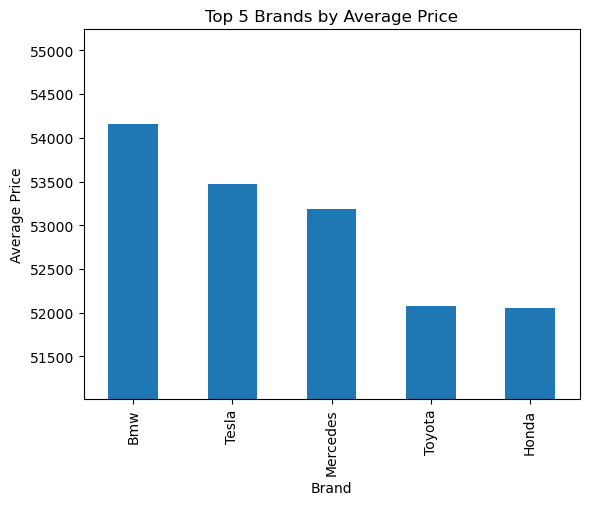

In [9]:
avg_price = df.groupby("Brand")["Price"].mean().sort_values(ascending=False)
top5_brands = avg_price.head(5)

plt.figure()
top5_brands.plot(kind="bar")

# Zoom Y-axis to highlight small differences
plt.ylim(top5_brands.min()*0.98, top5_brands.max()*1.02)

plt.title("Top 5 Brands by Average Price")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()



**The analysis shows that premium brands such as BMW, Tesla, and Mercedes command higher average selling prices 
compared to Toyota and Honda. This indicates strong brand value and pricing power, allowing dealerships to set 
higher base prices for these brands while maintaining profitability.**

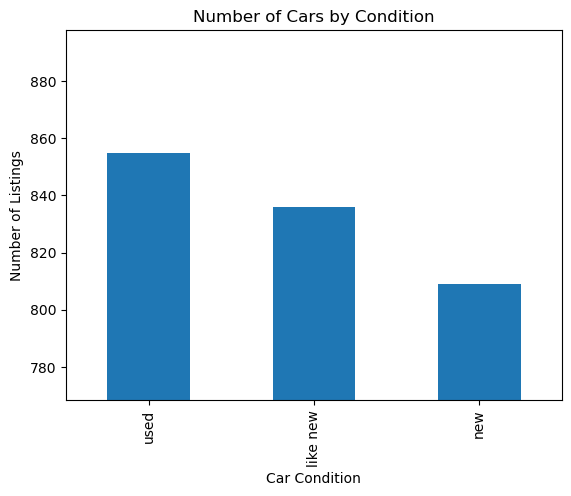

In [11]:
condition_count = df["Condition"].value_counts()

plt.figure()
condition_count.plot(kind="bar")

# Zoom Y-axis to highlight differences
plt.ylim(condition_count.min() * 0.95, condition_count.max() * 1.05)

plt.title("Number of Cars by Condition")
plt.xlabel("Car Condition")
plt.ylabel("Number of Listings")
plt.show()


**Most listings fall under the “Used” category, followed by “Like New” and “New”. Higher availability of used cars indicates stronger competition in this segment, which may require more competitive pricing strategies compared to lower-supply categories.**

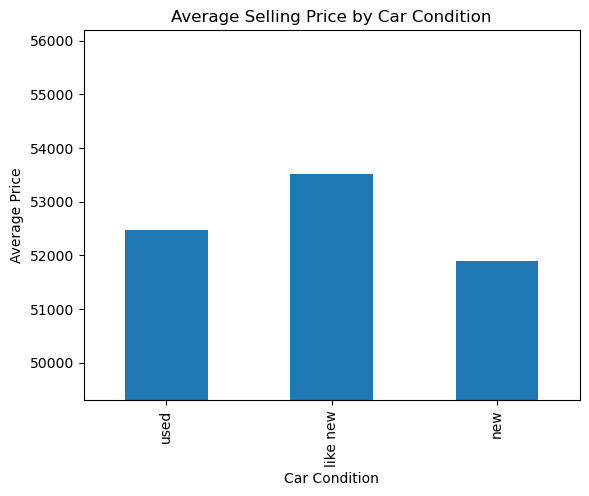

In [13]:
condition_price = df.groupby("Condition")["Price"].mean()

order = ["used", "like new", "new"]
condition_price = condition_price.reindex(order)

plt.figure()
condition_price.plot(kind="bar")

plt.ylim(condition_price.min()*0.95, condition_price.max()*1.05)

plt.title("Average Selling Price by Car Condition")
plt.xlabel("Car Condition")
plt.ylabel("Average Price")
plt.show()


**“Like New” vehicles show the highest average selling price, followed by used and new vehicles. This suggests that minimal wear combined with desirable brand and model features can outweigh condition labels alone, highlighting that condition should be evaluated along with brand and specifications during pricing.**

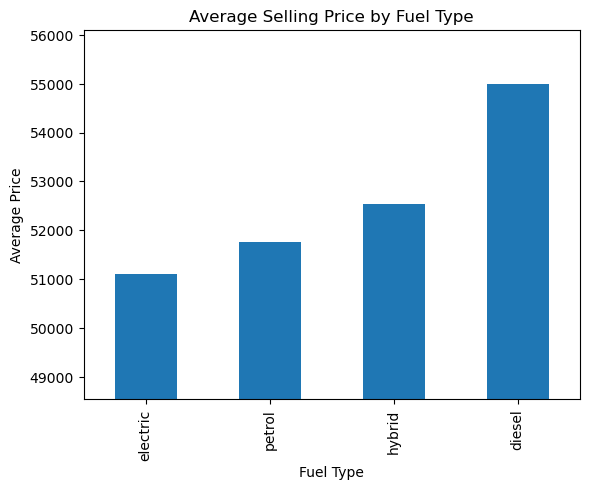

In [15]:
fuel_price = df.groupby("Fuel_Type")["Price"].mean().sort_values()

plt.figure()
fuel_price.plot(kind="bar")

plt.ylim(fuel_price.min()*0.95, fuel_price.max()*1.02)

plt.title("Average Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.show()



**Vehicles with diesel, hybrid, and electric fuel types tend to have higher average prices compared to petrol vehicles. This reflects increased market value for fuel-efficient and alternative fuel vehicles, indicating an opportunity to price such vehicles at a premium.**

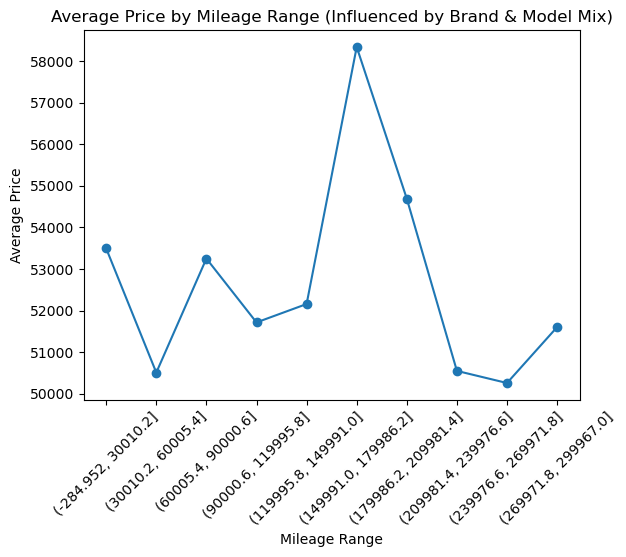

In [17]:
# Create mileage bins
df["Mileage_Band"] = pd.cut(
    df["Mileage"],
    bins=10
)

# Calculate average price per mileage band
mileage_price = df.groupby("Mileage_Band", observed=False)["Price"].mean()

plt.figure()
plt.plot(mileage_price.index.astype(str), mileage_price.values, marker="o")

plt.title("Average Price by Mileage Range (Influenced by Brand & Model Mix)")
plt.xlabel("Mileage Range")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()



**The relationship between mileage and price is not strictly linear. Some higher mileage ranges show higher average prices, suggesting that mileage alone does not determine vehicle value. Brand reputation, model type, and fuel technology significantly influence pricing alongside mileage.**